# Choix des variables explicatives 

**But du notebook :** réaliser des tests statistiques sur les variables issues de Bloomberg afin d'identifier celles pertinentes pour la régression. 

Deux conditions à vérifier : 

$-$ La variable explicative doit être utile pour expliquer la variable à expliquer, c'est-à-dire que *PD_1y* (la proba de défaut à 1 an) doit être corrélée à la variable. 

$-$ Pas de doublons entre les variables explicatives. Les variables explicatives choisies doivent être peu corrélées entre elles. 


---------------- 
# Résultats du notebook

Variables d'intérêt : 'Common Eqty / Tot Assets','Debt/EBITDA','EBITDA','Earnings Assets / Int Bear Liab','Debt / Common Equity','TCE Ratio','Interest Coverage Ratio','Risk-Based Cap Ratio','Lev Ratio to TCE','Tier-1 Ratio','Tot Debt / Tot Capital', 'Tot Cap (Local Crncy)','Is Covered','Is Convertible','Amt Out','Total Assets','Total Deposits','Total Expenses to Average Earning Assets','BCLASS Level 3', 'Guarantee Type', 'Guarantor Type, 'Collat Type' *(sont statistiquement significatives par rapport à PD_1y)*

Variables d'intéret moins ceux avec bcp de valeurs manquantes : 'Common Eqty / Tot Assets','Debt / Common Equity','TCE Ratio','Tot Debt / Tot Capital','Tot Cap (Local Crncy)','Is Covered','Is Convertible','Amt Out','Total Assets','BCLASS Level 3', 'Guarantee Type', 'Guarantor Type, 'Collat Type' *(statistiquement significative et assez nombreuses dans le dataset)*

**Variables d'intérêt moins les doublons moins bcp de valeurs manquantes : 'Common Eqty / Tot Assets','TCE Ratio','Tot Debt / Tot Capital','Tot Cap (Local Crncy)','Is Covered','Is Convertible','Amt Out','BCLASS Level 3', 'Guarantee Type', 'Guarantor Type, 'Collat Type'.** *(statistiquement significatives, assez nombreuses dans le dataset et peu corrélées entre elles)*




---------------------

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = pd.read_csv('market_data_pd_2.csv',sep = ',')

In [6]:
#df = df.drop(columns=['Unnamed: 0','Issuer Name','Maturity','Ask Price', 'Mid Price','Bid Price','Ticker','Reference Security','Cpn'])

In [11]:
df = df.drop(columns=['Unnamed: 0'])

In [12]:
df.head()
#potentielles variables explicatives, et variable expliquée : PD_1y

,Reference Security,Bid Price,Ask Price,Mid Price,Cpn,Maturity_x,Common Eqty / Tot Assets,Debt/EBITDA,EBITDA,Earnings Assets / Int Bear Liab,...,Is Covered,Is Convertible,Guarantee Type,Guarantor Type,Collat Type,Amt Out,OC Nominal Amt,Total Assets,Total Deposits,Total Expenses to Average Earning Assets
0,BP432479 Corp,101.651,102.311,101.9810,4.250,05/19/2026,17.1580,1.61252,70.221,NaN,...,False,False,Multiple,Company,SR SECURED,410000000.0,NaN,1267.0,NaN,NaN
1,BP432479 Corp,101.651,102.310,101.9805,4.250,05/19/2026,17.1580,1.61252,70.221,NaN,...,False,False,Multiple,Company,SR SECURED,410000000.0,NaN,1267.0,NaN,NaN
2,BP432479 Corp,101.500,102.200,101.8500,4.250,05/19/2026,17.1580,1.61252,70.221,NaN,...,False,False,Multiple,Company,SR SECURED,410000000.0,NaN,1267.0,NaN,NaN
3,AP137335 Corp,106.301,106.751,106.5260,1.625,09/18/2025,19.2457,NaN,NaN,0.0,...,False,False,Single,Parent,COMPANY GUARNT,600000000.0,NaN,NaN,NaN,NaN
4,AP137335 Corp,106.471,106.897,106.6840,1.625,09/18/2025,19.2457,NaN,NaN,0.0,...,False,False,Single,Parent,COMPANY GUARNT,600000000.0,NaN,NaN,NaN,NaN


In [13]:
df.shape

(7123, 33)

In [14]:
df.isnull().sum(axis = 0)

Reference Security                             0
Bid Price                                      1
Ask Price                                      5
Mid Price                                      5
Cpn                                            3
Maturity_x                                     0
Common Eqty / Tot Assets                     388
Debt/EBITDA                                 3577
EBITDA                                      2791
Earnings Assets / Int Bear Liab             4849
Debt / Common Equity                         592
BCLASS Level 3                                 0
TCE Ratio                                    539
Interest Coverage Ratio                     3449
Risk-Based Cap Ratio                        5018
Lev Ratio to TCE                            5714
Tier-1 Ratio                                5082
Tot Debt / Tot Capital                       435
PD_1y                                          0
reprice                                        3
Error %             

On distingue dans ce notebook les variables quantitatives (*partie I*) et les variables qualitatives (*partie II*). Les tests d'indépendance de ces variables sont différents. 


# I. VARIABLES QUANTITATIVES

# Observations des corrélations

In [15]:
corr_df = df.corr(method='spearman')
print("The correlation DataFrame is:")
print(corr_df, "\n")

The correlation DataFrame is:
                                          Bid Price  Ask Price  Mid Price  \
Bid Price                                  1.000000   0.981606   0.994520   
Ask Price                                  0.981606   1.000000   0.995116   
Mid Price                                  0.994520   0.995116   1.000000   
Cpn                                        0.354414   0.412949   0.384206   
Common Eqty / Tot Assets                   0.109153   0.116879   0.112266   
Debt/EBITDA                               -0.161777  -0.149624  -0.156327   
EBITDA                                     0.140346   0.096570   0.118490   
Earnings Assets / Int Bear Liab           -0.052883  -0.048015  -0.050150   
Debt / Common Equity                      -0.126045  -0.139480  -0.133776   
TCE Ratio                                  0.018667   0.014607   0.015352   
Interest Coverage Ratio                    0.077568   0.050092   0.062831   
Risk-Based Cap Ratio                      -0.1

In [16]:
corr = abs(corr_df)

In [17]:
corr

,Bid Price,Ask Price,Mid Price,Cpn,Common Eqty / Tot Assets,Debt/EBITDA,EBITDA,Earnings Assets / Int Bear Liab,Debt / Common Equity,TCE Ratio,...,reprice,Error %,Tot Cap (Local Crncy),Is Covered,Is Convertible,Amt Out,OC Nominal Amt,Total Assets,Total Deposits,Total Expenses to Average Earning Assets
Bid Price,1.000000,0.981606,0.994520,0.354414,0.109153,0.161777,0.140346,0.052883,0.126045,0.018667,...,0.957895,0.119951,0.059834,0.067289,0.090038,0.197304,0.110417,0.054886,0.121442,0.065344
Ask Price,0.981606,1.000000,0.995116,0.412949,0.116879,0.149624,0.096570,0.048015,0.139480,0.014607,...,0.957834,0.115224,0.012662,0.091766,0.104788,0.143731,0.072448,0.006623,0.107025,0.062651
Mid Price,0.994520,0.995116,1.000000,0.384206,0.112266,0.156327,0.118490,0.050150,0.133776,0.015352,...,0.963032,0.117792,0.035638,0.079638,0.097862,0.171002,0.090030,0.031014,0.114199,0.063003
Cpn,0.354414,0.412949,0.384206,1.000000,0.141091,0.094315,0.225755,0.036103,0.154194,0.042864,...,0.443055,0.126860,0.285826,0.252274,0.117290,0.242728,0.132687,0.280828,0.141708,0.405111
Common Eqty / Tot Assets,0.109153,0.116879,0.112266,0.141091,1.000000,0.417639,0.038006,0.016407,0.846797,0.385452,...,0.086909,0.001201,0.273912,0.206951,0.121227,0.238695,0.184884,0.356809,0.197847,0.242547
Debt/EBITDA,0.161777,0.149624,0.156327,0.094315,0.417639,1.000000,0.295681,0.098190,0.552278,0.045595,...,0.139422,0.091467,0.011273,0.105525,0.061380,0.024170,1.000000,0.022002,0.421977,0.798227
EBITDA,0.140346,0.096570,0.118490,0.225755,0.038006,0.295681,1.000000,0.000395,0.076614,0.060859,...,0.148967,0.118451,0.751329,0.014402,0.157500,0.440831,0.340453,0.776113,0.846801,0.398818
Earnings Assets / Int Bear Liab,0.052883,0.048015,0.050150,0.036103,0.016407,0.098190,0.000395,1.000000,0.377399,0.010729,...,0.040007,0.070526,0.165295,0.150762,0.069971,0.046983,0.070946,0.298116,0.225183,0.726053
Debt / Common Equity,0.126045,0.139480,0.133776,0.154194,0.846797,0.552278,0.076614,0.377399,1.000000,0.296409,...,0.100815,0.056805,0.314998,0.183179,0.146351,0.223468,0.173564,0.280253,0.191732,0.007701
TCE Ratio,0.018667,0.014607,0.015352,0.042864,0.385452,0.045595,0.060859,0.010729,0.296409,1.000000,...,0.005146,0.004995,0.011989,0.003726,0.061505,0.165809,0.244155,0.031833,0.269301,0.294139


Text(0.5, 1.0, 'Matrice de corrélation des variables')

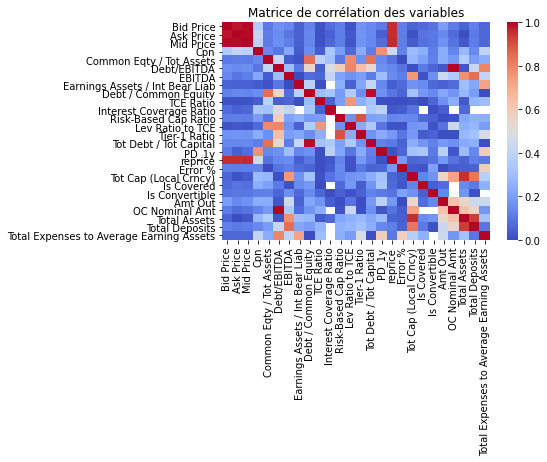

In [18]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=0.00, vmax=1,cmap='coolwarm')

plt.title('Matrice de corrélation des variables')

# Tests statistiques 

**3 tests identifiés : Pearson, Spearman et Kendall.**

Hypothèse $H_0$ *:* $\rho = 0$ *(indépendance). VS* $H_1$ *:*  $\rho \ne 0$ *(non indépendance)*

**p-value :** Si $\alpha_{obs} < \alpha_{seuil}$, on rejette l'hypothèse $H_0$ d'indépendance.

$-$ **Pearson :** suppose que les échantillons suivent une loi normale *(limite de ce test)*. Relation linéaire.

$-$ **Spearman & Kendall :** *ok* Relation monotone

In [19]:
from scipy import stats
from scipy.stats.stats import *

In [20]:
df.dtypes

Reference Security                           object
Bid Price                                   float64
Ask Price                                   float64
Mid Price                                   float64
Cpn                                         float64
Maturity_x                                   object
Common Eqty / Tot Assets                    float64
Debt/EBITDA                                 float64
EBITDA                                      float64
Earnings Assets / Int Bear Liab             float64
Debt / Common Equity                        float64
BCLASS Level 3                               object
TCE Ratio                                   float64
Interest Coverage Ratio                     float64
Risk-Based Cap Ratio                        float64
Lev Ratio to TCE                            float64
Tier-1 Ratio                                float64
Tot Debt / Tot Capital                      float64
PD_1y                                       float64
reprice     

In [21]:
colonnes = ['Common Eqty / Tot Assets', 'Debt / Common Equity','Debt/EBITDA', 'EBITDA', 'Earnings Assets / Int Bear Liab','Conversion Ratio','Interest Coverage Ratio','Lev Ratio to TCE','Risk-Based Cap Ratio','TCE Ratio','Tier-1 Ratio',
            'Tot Cap (Local Crncy)','Is Covered','Is Convertible','Guarantee Type','Guarantor Type','Collat Type','Amt Out','OC Nominal Amt','Total Assets','Total Deposits','Total Expenses to Average Earnings Assets']

In [29]:
colonnes = ['Common Eqty / Tot Assets','Debt/EBITDA','EBITDA','Earnings Assets / Int Bear Liab','Debt / Common Equity','TCE Ratio',
           'Interest Coverage Ratio','Risk-Based Cap Ratio','Lev Ratio to TCE','Tier-1 Ratio','Tot Debt / Tot Capital',
           'Tot Cap (Local Crncy)','Is Covered','Is Convertible','Amt Out','OC Nominal Amt','Total Assets','Total Deposits','Total Expenses to Average Earning Assets']

# I. Pertinence sur la variable à expliquer 

In [25]:
corr2= df.corr(method='spearman')
corr2["PD_1y"]

Bid Price                                  -0.108689
Ask Price                                  -0.045362
Mid Price                                  -0.077009
Cpn                                         0.773042
Common Eqty / Tot Assets                    0.141124
Debt/EBITDA                                 0.161930
EBITDA                                     -0.299720
Earnings Assets / Int Bear Liab             0.138462
Debt / Common Equity                       -0.163937
TCE Ratio                                  -0.009265
Interest Coverage Ratio                    -0.384139
Risk-Based Cap Ratio                       -0.218848
Lev Ratio to TCE                            0.096610
Tier-1 Ratio                               -0.234871
Tot Debt / Tot Capital                     -0.122136
PD_1y                                       1.000000
reprice                                    -0.015172
Error %                                    -0.061633
Tot Cap (Local Crncy)                      -0.

## a. Pearson

In [30]:
#PEARSON

print("TEST DE PEARSON")

for col in colonnes :
    
    print("###### \n ")
    
    df_bis = df[['PD_1y',col]].dropna(how = 'any') 
    
    print(col)
    print(stats.pearsonr(df_bis['PD_1y'],df_bis[col]))

TEST DE PEARSON
###### 
 
Common Eqty / Tot Assets
(-0.028196787400961838, 0.02066456318749256)
###### 
 
Debt/EBITDA
(0.029667382830672235, 0.07732740185593517)
###### 
 
EBITDA
(0.006344006356926805, 0.6763616696313802)
###### 
 
Earnings Assets / Int Bear Liab
(0.019652576852196724, 0.3488936963421276)
###### 
 
Debt / Common Equity
(0.0014142034977705485, 0.9090265576791795)
###### 
 
TCE Ratio
(-0.030258949467009154, 0.014074231692960478)
###### 
 
Interest Coverage Ratio
(-0.11955942610194392, 3.5804074761975915e-13)
###### 
 
Risk-Based Cap Ratio
(-0.04236481867910942, 0.051964508000018894)
###### 
 
Lev Ratio to TCE
(-0.018804637394303072, 0.48062420443344683)
###### 
 
Tier-1 Ratio
(-0.06458247890213226, 0.0035123469234012816)
###### 
 
Tot Debt / Tot Capital
(0.03938523064954466, 0.0012748603118112969)
###### 
 
Tot Cap (Local Crncy)
(0.0017548377270015013, 0.8858907984986701)
###### 
 
Is Covered
(-0.08040688880079033, 1.075754781028385e-11)
###### 
 
Is Convertible
(0.16364

**Observation des p-values :** Common Eqty / Tot Assets, Debt/EBITDA, TCE Ratio, Interest Coverage Ratio, Risk-Based Cap Ratio, Tier-1 Ratio, Tot Debt / Tot capital, Is Covered, Is Convertible, Amt Out


## b. Spearman 

In [31]:
#SPEARMAN

print("TEST DE SPEARMAN")

for col in colonnes :
    
    
    print("###### \n ")
    df_bis = df[['PD_1y',col]].dropna(how = 'any') 
    
    print(col)
    print(stats.spearmanr(df_bis['PD_1y'],df_bis[col]))

TEST DE SPEARMAN
###### 
 
Common Eqty / Tot Assets
SpearmanrResult(correlation=0.14112440789263392, pvalue=2.6475884325310837e-31)
###### 
 
Debt/EBITDA
SpearmanrResult(correlation=0.16192966242085977, pvalue=2.917881120724689e-22)
###### 
 
EBITDA
SpearmanrResult(correlation=-0.2997199572808131, pvalue=1.2707890894653043e-90)
###### 
 
Earnings Assets / Int Bear Liab
SpearmanrResult(correlation=0.13846162615225077, pvalue=3.3324068222119194e-11)
###### 
 
Debt / Common Equity
SpearmanrResult(correlation=-0.1639368392415757, pvalue=1.424039584570654e-40)
###### 
 
TCE Ratio
SpearmanrResult(correlation=-0.009264892990010985, pvalue=0.45226520030397954)
###### 
 
Interest Coverage Ratio
SpearmanrResult(correlation=-0.3841388934348869, pvalue=1.700392803191418e-129)
###### 
 
Risk-Based Cap Ratio
SpearmanrResult(correlation=-0.21884840736502362, pvalue=3.0451705817286027e-24)
###### 
 
Lev Ratio to TCE
SpearmanrResult(correlation=0.09661033747392862, pvalue=0.00028155195845276757)
######

**Observations des p-values :** Common Eqty / Tot Assets, Debt/EBITDA, EBITDA, Earnings Assets / Int Bear Liab, Debt / Common Equity, Interest Coverage Ratio, Risk-Based Cap Ratio, Lev Ratio to TCE, Tier-1 Ratio, Tot Debt / Tot Capital, Tot Cap (Local Crncy), Is Covered, Is Convertible, Amt Out, Total Assets, Total Deposits, Total Expenses to Average Earning Assets


## c. Kendall 

In [32]:
#KENDALL

print("TEST DE KENDALL")

for col in colonnes :
    
    print("###### \n ") 
    
    df_bis = df[['PD_1y',col]].dropna(how = 'any') 
    
    print(col)
    print(stats.kendalltau(df_bis['PD_1y'],df_bis[col]))

TEST DE KENDALL
###### 
 
Common Eqty / Tot Assets
KendalltauResult(correlation=0.09320427412283427, pvalue=2.6423045412442415e-30)
###### 
 
Debt/EBITDA
KendalltauResult(correlation=0.11201533631884927, pvalue=2.0299277358399767e-23)
###### 
 
EBITDA
KendalltauResult(correlation=-0.20203057390320875, pvalue=5.490711768875357e-88)
###### 
 
Earnings Assets / Int Bear Liab
KendalltauResult(correlation=0.09728231762779511, pvalue=6.003515979349237e-12)
###### 
 
Debt / Common Equity
KendalltauResult(correlation=-0.10827918389162193, pvalue=3.994857934569022e-39)
###### 
 
TCE Ratio
KendalltauResult(correlation=-0.006543956305093369, pvalue=0.4271599087110065)
###### 
 
Interest Coverage Ratio
KendalltauResult(correlation=-0.2690055027795965, pvalue=1.572807274656452e-131)
###### 
 
Risk-Based Cap Ratio
KendalltauResult(correlation=-0.14987031766945458, pvalue=2.3179329319604576e-24)
###### 
 
Lev Ratio to TCE
KendalltauResult(correlation=0.06788382117341439, pvalue=0.0001834296517975056)

**Observation des p-values :** Common Eqty / Tot Assets, Debt/EBITDA, EBITDA, Earnings Assets / Int Bear Liab, Debt / Common Equity, Interest Coverage Ratio, Risk-Based Cap Ratio, Lev Ratio to TCE, Tier-1 Ratio, Tot Debt / Tot Capital, Tot Cap (Local Crncy), Is Covered, Is Convertible, Amt Out, Total Assets, Total Deposits, Total Expenses to Average Earning Assets

**CONCLUSION**

On compare les résultats des 3 tests. Les variables qu'on retient sont celles pour lesquelles on rejette l'hypothèse d'indépendance avec la variable expliquée, ie celles avec une p-value très faible.


On choisit **Common Eqty / Tot Assets, Debt/EBITDA, EBITDA, Earnings Assets / Int Bear Liab, Debt / Common Equity, Interest Coverage Ratio, Risk-Based Cap Ratio, Lev Ratio to TCE, Tier-1 Ratio, Tot Debt / Tot Capital, Tot Cap (Local Crncy), Is Covered, Is Convertible, Amt Out, Total Assets, Total Deposits, Total Expenses to Average Earning Assets, TCE Ratio**.

# II. Corrélations entre variables explicatives

In [43]:
var = df[['Common Eqty / Tot Assets','Debt/EBITDA','EBITDA','Earnings Assets / Int Bear Liab','Debt / Common Equity','TCE Ratio',
           'Interest Coverage Ratio','Risk-Based Cap Ratio','Lev Ratio to TCE','Tier-1 Ratio','Tot Debt / Tot Capital',
           'Tot Cap (Local Crncy)','Is Covered','Is Convertible','Amt Out','Total Assets','Total Deposits','Total Expenses to Average Earning Assets']]

In [34]:
var

,Common Eqty / Tot Assets,Debt/EBITDA,EBITDA,Earnings Assets / Int Bear Liab,Debt / Common Equity,TCE Ratio,Interest Coverage Ratio,Risk-Based Cap Ratio,Lev Ratio to TCE,Tier-1 Ratio,Tot Debt / Tot Capital,Tot Cap (Local Crncy),Is Covered,Is Convertible,Amt Out,Total Assets,Total Deposits,Total Expenses to Average Earning Assets
0,17.15800,1.61252,70.221,NaN,351.535,-171.02700,0.857497,NaN,NaN,NaN,77.8533,981.602,False,False,4.100000e+08,1267.00,NaN,NaN
1,17.15800,1.61252,70.221,NaN,351.535,-171.02700,0.857497,NaN,NaN,NaN,77.8533,981.602,False,False,4.100000e+08,1267.00,NaN,NaN
2,17.15800,1.61252,70.221,NaN,351.535,-171.02700,0.857497,NaN,NaN,NaN,77.8533,981.602,False,False,4.100000e+08,1267.00,NaN,NaN
3,19.24570,NaN,NaN,0.000,410.513,NaN,NaN,NaN,NaN,NaN,80.4119,26767.200,False,False,6.000000e+08,NaN,NaN,NaN
4,19.24570,NaN,NaN,0.000,410.513,NaN,NaN,NaN,NaN,NaN,80.4119,26767.200,False,False,6.000000e+08,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7118,1.35692,NaN,NaN,NaN,7097.880,NaN,NaN,NaN,NaN,NaN,98.6107,1391.460,False,True,1.000000e+08,1424.65,NaN,NaN
7119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,3.000000e+08,NaN,NaN,NaN
7120,9.64322,3.57560,2324.300,NaN,808.773,-477.08700,6.430120,NaN,NaN,NaN,88.9856,11012.900,False,False,1.000000e+09,12565.30,NaN,NaN
7121,5.26483,NaN,NaN,183.242,399.757,4.79911,NaN,20.0,NaN,16.8,72.2617,80792.000,True,False,7.500000e+08,277394.00,191070.0,NaN


In [39]:
colonnes2 = ['Common Eqty / Tot Assets','Debt/EBITDA','EBITDA','Earnings Assets / Int Bear Liab','Debt / Common Equity','TCE Ratio',
           'Interest Coverage Ratio','Risk-Based Cap Ratio','Lev Ratio to TCE','Tier-1 Ratio','Tot Debt / Tot Capital',
           'Tot Cap (Local Crncy)','Is Covered','Is Convertible','Amt Out','Total Assets','Total Deposits','Total Expenses to Average Earning Assets']

In [35]:
var.isnull().sum(axis = 0)

Common Eqty / Tot Assets                     388
Debt/EBITDA                                 3577
EBITDA                                      2791
Earnings Assets / Int Bear Liab             4849
Debt / Common Equity                         592
TCE Ratio                                    539
Interest Coverage Ratio                     3449
Risk-Based Cap Ratio                        5018
Lev Ratio to TCE                            5714
Tier-1 Ratio                                5082
Tot Debt / Tot Capital                       435
Tot Cap (Local Crncy)                        433
Is Covered                                     0
Is Convertible                                 0
Amt Out                                        0
Total Assets                                 512
Total Deposits                              5137
Total Expenses to Average Earning Assets    6759
dtype: int64

Problème des valeurs manquantes : *Int Exp / Avg Int Bear Liab*, *Debt/EBITDA*, *Earnings Assets / Int Bear Liab*, *Interest Coverage Ratio*, *Risk-Based Cap Ratio* et *EBITDA* ont énormèment de valeurs manquantes. Cela sera problématique ensuite pour le réseau de neurones.

## 1) en gardant toutes les variables

In [36]:
corr_var = var.corr(method='spearman')
print("The correlation DataFrame is:")
print(corr_var, "\n")

The correlation DataFrame is:
                                          Common Eqty / Tot Assets  \
Common Eqty / Tot Assets                                  1.000000   
Debt/EBITDA                                              -0.417639   
EBITDA                                                    0.038006   
Earnings Assets / Int Bear Liab                           0.016407   
Debt / Common Equity                                     -0.846797   
TCE Ratio                                                 0.385452   
Interest Coverage Ratio                                   0.309927   
Risk-Based Cap Ratio                                      0.101354   
Lev Ratio to TCE                                          0.787777   
Tier-1 Ratio                                              0.158993   
Tot Debt / Tot Capital                                   -0.842892   
Tot Cap (Local Crncy)                                    -0.273912   
Is Covered                                               -0.

Text(0.5, 1.0, 'Matrice de corrélation des variables')

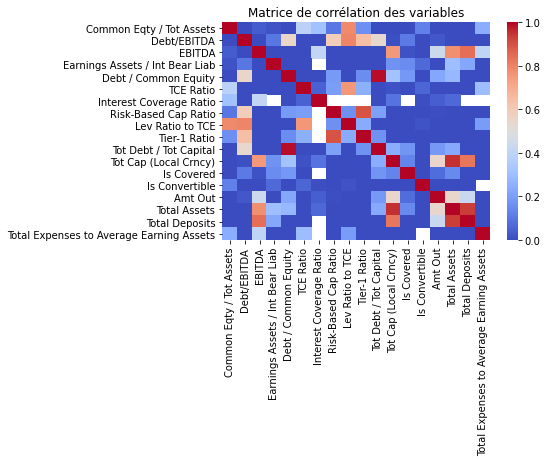

In [37]:
sns.heatmap(corr_var, xticklabels=corr_var.columns, yticklabels=corr_var.columns, vmin=0.00, vmax=1,cmap='coolwarm')

plt.title('Matrice de corrélation des variables')

Doublon entre Common Eqty / Tot Aassets et Average Equity / Average Assets, et Int Exp / avg int bear liab et Debt/EBITDA.

## a. Spearman

In [40]:
print("TEST DE SPEARMAN")

for col1 in colonnes2 :
    print("\n##############################\n")
    print("VAR = " + col1)
    for col2 in colonnes2 : 
        
        if col1 != col2 :
    
            df_bis = var[[col1,col2]].dropna(how = 'any') 
        
            print("----")
            print(col2)
            print(stats.spearmanr(df_bis[col1],df_bis[col2]))

TEST DE SPEARMAN

##############################

VAR = Common Eqty / Tot Assets
----
Debt/EBITDA
SpearmanrResult(correlation=-0.4176385185318501, pvalue=1.0028149709285258e-149)
----
EBITDA
SpearmanrResult(correlation=0.038006000462718056, pvalue=0.01239161732570914)
----
Earnings Assets / Int Bear Liab
SpearmanrResult(correlation=0.016407493652073654, pvalue=0.43419224442934823)
----
Debt / Common Equity
SpearmanrResult(correlation=-0.8467969856106107, pvalue=0.0)
----
TCE Ratio
SpearmanrResult(correlation=0.38545223793327116, pvalue=3.317661458069846e-232)
----
Interest Coverage Ratio
SpearmanrResult(correlation=0.30992666527195384, pvalue=1.2712387757205235e-82)
----
Risk-Based Cap Ratio
SpearmanrResult(correlation=0.10135362089547842, pvalue=3.171744263627354e-06)
----
Lev Ratio to TCE
SpearmanrResult(correlation=0.7877766261703221, pvalue=2.150432044073868e-298)
----
Tier-1 Ratio
SpearmanrResult(correlation=0.1589925436233, pvalue=5.030481849737005e-13)
----
Tot Debt / Tot Capita

----
Debt / Common Equity
SpearmanrResult(correlation=-0.32077940702651314, pvalue=6.126947868334748e-85)
----
TCE Ratio
SpearmanrResult(correlation=0.048207661891188795, pvalue=0.003577761939615508)
----
Risk-Based Cap Ratio
SpearmanrResult(correlation=nan, pvalue=nan)
----
Lev Ratio to TCE
SpearmanrResult(correlation=nan, pvalue=nan)
----
Tier-1 Ratio
SpearmanrResult(correlation=nan, pvalue=nan)
----
Tot Debt / Tot Capital
SpearmanrResult(correlation=-0.3407147683707387, pvalue=2.13170418557703e-100)
----
Tot Cap (Local Crncy)
SpearmanrResult(correlation=0.0908414541733009, pvalue=3.5327171358648124e-08)
----
Is Covered
SpearmanrResult(correlation=nan, pvalue=nan)
----
Is Convertible
SpearmanrResult(correlation=0.006130717515176574, pvalue=0.7102789553192361)
----
Amt Out
SpearmanrResult(correlation=0.040246472376898976, pvalue=0.014701943347161137)
----
Total Assets
SpearmanrResult(correlation=0.06611272011884853, pvalue=6.982092449738166e-05)
----
Total Deposits
SpearmanrResult(cor

C:\Users\mathilde.binet\Anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


----
Tier-1 Ratio
SpearmanrResult(correlation=0.2355032379429063, pvalue=4.976243728335934e-18)
----
Tot Debt / Tot Capital
SpearmanrResult(correlation=-0.3420448435566795, pvalue=5.977701741903165e-40)
----
Tot Cap (Local Crncy)
SpearmanrResult(correlation=-0.17472500244263903, pvalue=4.012108732287424e-11)
----
Is Covered
SpearmanrResult(correlation=-0.18491075412127309, pvalue=2.6492682438326632e-12)
----
Is Convertible
SpearmanrResult(correlation=0.017510722014493236, pvalue=0.5113347235950718)
----
Amt Out
SpearmanrResult(correlation=-0.09018894587527881, pvalue=0.0007007253116972055)
----
Total Assets
SpearmanrResult(correlation=-0.2514525559483245, pvalue=9.271078482064857e-22)
----
Total Deposits
SpearmanrResult(correlation=-0.27724368573992936, pvalue=1.052283748545543e-23)
----
Total Expenses to Average Earning Assets
SpearmanrResult(correlation=0.19389744466746472, pvalue=0.017054180192098565)

##############################

VAR = Tier-1 Ratio
----
Common Eqty / Tot Assets


C:\Users\mathilde.binet\Anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
C:\Users\mathilde.binet\Anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


----
Tier-1 Ratio
SpearmanrResult(correlation=-0.05090998392600826, pvalue=0.0214445573550464)
----
Tot Debt / Tot Capital
SpearmanrResult(correlation=-0.12808681375696315, pvalue=7.263412412893718e-26)
----
Tot Cap (Local Crncy)
SpearmanrResult(correlation=-0.16915980847661474, pvalue=3.940567952173813e-44)
----
Is Covered
SpearmanrResult(correlation=-0.04362426398091926, pvalue=0.00023059392980070997)
----
Amt Out
SpearmanrResult(correlation=-0.1397139332963782, pvalue=2.2134108045654739e-32)
----
Total Assets
SpearmanrResult(correlation=-0.17331770187689466, pvalue=9.558121187536734e-46)
----
Total Deposits
SpearmanrResult(correlation=-0.011738853829936126, pvalue=0.6010956877276381)
----
Total Expenses to Average Earning Assets
SpearmanrResult(correlation=nan, pvalue=nan)

##############################

VAR = Amt Out
----
Common Eqty / Tot Assets
SpearmanrResult(correlation=-0.23869472839537043, pvalue=6.934592678690349e-88)
----
Debt/EBITDA
SpearmanrResult(correlation=0.024169611

C:\Users\mathilde.binet\Anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


## b. Kendall

In [41]:
print("TEST DE KENDALL")

for col1 in colonnes2 :
    print("\n##############################\n")
    print("VAR = " + col1)
    for col2 in colonnes2 : 
        
        if col1 != col2 :
    
            df_bis = var[[col1,col2]].dropna(how = 'any') 
        
            print("----")
            print(col2)
            print(stats.kendalltau(df_bis[col1],df_bis[col2]))

TEST DE KENDALL

##############################

VAR = Common Eqty / Tot Assets
----
Debt/EBITDA
KendalltauResult(correlation=-0.29792965278344086, pvalue=5.974475588681632e-155)
----
EBITDA
KendalltauResult(correlation=0.024408275079274133, pvalue=0.016326212233267173)
----
Earnings Assets / Int Bear Liab
KendalltauResult(correlation=0.011415981059490177, pvalue=0.42096651602604107)
----
Debt / Common Equity
KendalltauResult(correlation=-0.6954085718601378, pvalue=0.0)
----
TCE Ratio
KendalltauResult(correlation=0.3823080786252432, pvalue=0.0)
----
Interest Coverage Ratio
KendalltauResult(correlation=0.21444446690021024, pvalue=3.6274741295160543e-84)
----
Risk-Based Cap Ratio
KendalltauResult(correlation=0.06776262144585195, pvalue=4.479306549999232e-06)
----
Lev Ratio to TCE
KendalltauResult(correlation=0.6152898431860692, pvalue=6.546441143744824e-247)
----
Tier-1 Ratio
KendalltauResult(correlation=0.11186241814189236, pvalue=1.0639413405492227e-13)
----
Tot Debt / Tot Capital
Kend

----
Debt/EBITDA
KendalltauResult(correlation=0.4085698824223939, pvalue=2.4441937585358526e-15)
----
EBITDA
KendalltauResult(correlation=-0.17144815068620006, pvalue=1.1305751720525279e-05)
----
Earnings Assets / Int Bear Liab
KendalltauResult(correlation=-0.16595573604516495, pvalue=8.510955892558709e-24)
----
Debt / Common Equity
KendalltauResult(correlation=0.12578915231621765, pvalue=1.6453688537268764e-17)
----
TCE Ratio
KendalltauResult(correlation=0.13444916380709737, pvalue=9.367595878534476e-20)
----
Interest Coverage Ratio
KendalltauResult(correlation=nan, pvalue=nan)
----
Lev Ratio to TCE
KendalltauResult(correlation=0.11574065975474992, pvalue=5.847485973242817e-10)
----
Tier-1 Ratio
KendalltauResult(correlation=0.7460921986719743, pvalue=0.0)
----
Tot Debt / Tot Capital
KendalltauResult(correlation=0.13771068986899032, pvalue=1.124862556698471e-20)
----
Tot Cap (Local Crncy)
KendalltauResult(correlation=-0.09791747665208006, pvalue=3.370281394274008e-11)
----
Is Covered
K

----
Tot Cap (Local Crncy)
KendalltauResult(correlation=0.10584324734762043, pvalue=3.381779461030318e-26)
----
Is Convertible
KendalltauResult(correlation=-0.043624263980919266, pvalue=0.0002318326931387479)
----
Amt Out
KendalltauResult(correlation=0.0658108003922334, pvalue=6.453967405926696e-11)
----
Total Assets
KendalltauResult(correlation=0.11971277949194509, pvalue=1.1226416291981503e-32)
----
Total Deposits
KendalltauResult(correlation=-0.08705121495867144, pvalue=2.3978801902636677e-06)
----
Total Expenses to Average Earning Assets
KendalltauResult(correlation=-0.2173186341218831, pvalue=9.980789761919156e-07)

##############################

VAR = Is Convertible
----
Common Eqty / Tot Assets
KendalltauResult(correlation=0.09910974294173258, pvalue=2.5729283909340324e-23)
----
Debt/EBITDA
KendalltauResult(correlation=-0.05019933724585796, pvalue=0.0002576459809102316)
----
EBITDA
KendalltauResult(correlation=-0.12878505885878005, pvalue=3.572575578989598e-25)
----
Earnings As

KendalltauResult(correlation=0.03727571599142936, pvalue=0.3216934235575941)
----
TCE Ratio
KendalltauResult(correlation=0.25965423052388814, pvalue=5.092617098501425e-12)
----
Interest Coverage Ratio
KendalltauResult(correlation=nan, pvalue=nan)
----
Risk-Based Cap Ratio
KendalltauResult(correlation=-0.17801258267462497, pvalue=0.0002478797273169707)
----
Lev Ratio to TCE
KendalltauResult(correlation=0.04384308789595133, pvalue=0.48681334622364514)
----
Tier-1 Ratio
KendalltauResult(correlation=-0.3708662687530247, pvalue=2.2689268044141345e-14)
----
Tot Debt / Tot Capital
KendalltauResult(correlation=0.05873501365740361, pvalue=0.11840946326693805)
----
Tot Cap (Local Crncy)
KendalltauResult(correlation=-0.24136803022620584, pvalue=1.3914339394349874e-10)
----
Is Covered
KendalltauResult(correlation=-0.2173186341218831, pvalue=9.980789761919156e-07)
----
Is Convertible
KendalltauResult(correlation=nan, pvalue=nan)
----
Amt Out
KendalltauResult(correlation=-0.3238653014481314, pvalue=

## 2) en ne gardant que les variables avec peu de NaN

In [44]:
var2 = df[['Common Eqty / Tot Assets','Debt / Common Equity','TCE Ratio','Tot Debt / Tot Capital',
           'Tot Cap (Local Crncy)','Is Covered','Is Convertible','Amt Out','Total Assets']]

In [45]:
var2.isnull().sum(axis = 0)

Common Eqty / Tot Assets    388
Debt / Common Equity        592
TCE Ratio                   539
Tot Debt / Tot Capital      435
Tot Cap (Local Crncy)       433
Is Covered                    0
Is Convertible                0
Amt Out                       0
Total Assets                512
dtype: int64

Text(0.5, 1.0, 'Matrice de corrélation des variables')

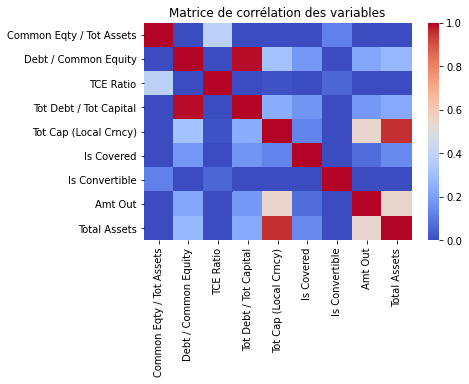

In [46]:
corr_var2 = var2.corr(method='spearman')
sns.heatmap(corr_var2, xticklabels=corr_var2.columns, yticklabels=corr_var2.columns, vmin=0.00, vmax=1,cmap='coolwarm')
plt.title('Matrice de corrélation des variables')

doublon entre Total Assets et Tot Cap, et entre Tot Debt / Tot Capital et Debt / Common Equity.
On conserve Tot Cap et Tot Debt / Tot Capital.

In [30]:
colonnes3 = ["Average Equity / Average Assets","Common Eqty / Tot Assets","Debt / Common Equity"]

print("TEST DE SPEARMAN")

for col1 in colonnes3 :
    print("\n##############################\n")
    print("VAR = " + col1)
    for col2 in colonnes3 : 
        
        if col1 != col2 :
    
            df_bis = var2[[col1,col2]].dropna(how = 'any') 
        
            print("----")
            print(col2)
            print(stats.spearmanr(df_bis[col1],df_bis[col2]))

TEST DE SPEARMAN

##############################

VAR = Average Equity / Average Assets
----
Common Eqty / Tot Assets
SpearmanrResult(correlation=0.9878115933767302, pvalue=0.0)
----
Debt / Common Equity
SpearmanrResult(correlation=-0.6891318405090693, pvalue=7.5952611177317065e-78)

##############################

VAR = Common Eqty / Tot Assets
----
Average Equity / Average Assets
SpearmanrResult(correlation=0.9878115933767302, pvalue=0.0)
----
Debt / Common Equity
SpearmanrResult(correlation=-0.6880372119803523, pvalue=1.7420150310955214e-78)

##############################

VAR = Debt / Common Equity
----
Average Equity / Average Assets
SpearmanrResult(correlation=-0.6891318405090693, pvalue=7.5952611177317065e-78)
----
Common Eqty / Tot Assets
SpearmanrResult(correlation=-0.6880372119803523, pvalue=1.7420150310955214e-78)


In [31]:
print("TEST DE KENDALL")

for col1 in colonnes3 :
    print("\n##############################\n")
    print("VAR = " + col1)
    for col2 in colonnes3 : 
        
        if col1 != col2 :
    
            df_bis = var2[[col1,col2]].dropna(how = 'any') 
        
            print("----")
            print(col2)
            print(stats.kendalltau(df_bis[col1],df_bis[col2]))

TEST DE KENDALL

##############################

VAR = Average Equity / Average Assets
----
Common Eqty / Tot Assets
KendalltauResult(correlation=0.9364807737404851, pvalue=3.0302007030672375e-237)
----
Debt / Common Equity
KendalltauResult(correlation=-0.5585870832214281, pvalue=2.8766608970532025e-82)

##############################

VAR = Common Eqty / Tot Assets
----
Average Equity / Average Assets
KendalltauResult(correlation=0.9364807737404851, pvalue=3.0302007030672375e-237)
----
Debt / Common Equity
KendalltauResult(correlation=-0.5680775533463505, pvalue=3.783770773858007e-86)

##############################

VAR = Debt / Common Equity
----
Average Equity / Average Assets
KendalltauResult(correlation=-0.5585870832214282, pvalue=2.8766608970532025e-82)
----
Common Eqty / Tot Assets
KendalltauResult(correlation=-0.5680775533463505, pvalue=3.783770773858007e-86)


In [32]:
#PEARSON

print("TEST DE PEARSON")

for col1 in colonnes3 :
    print("\n##############################\n")
    print("VAR = " + col1)
    for col2 in colonnes3 : 
        
        if col1 != col2 :
    
            df_bis = var2[[col1,col2]].dropna(how = 'any') 
        
            print("----")
            print(col2)
            print(stats.pearsonr(df_bis[col1],df_bis[col2]))

TEST DE PEARSON

##############################

VAR = Average Equity / Average Assets
----
Common Eqty / Tot Assets
(0.9870870450730153, 0.0)
----
Debt / Common Equity
(-0.13059673323875504, 0.0022725574946073092)

##############################

VAR = Common Eqty / Tot Assets
----
Average Equity / Average Assets
(0.9870870450730153, 0.0)
----
Debt / Common Equity
(-0.1252560524354834, 0.0032283612348077287)

##############################

VAR = Debt / Common Equity
----
Average Equity / Average Assets
(-0.13059673323875504, 0.0022725574946073092)
----
Common Eqty / Tot Assets
(-0.1252560524354834, 0.0032283612348077287)


### CONCLUSION SUR LES VARIABLES QUANTI 

Variables d'intérêt : 'Common Eqty / Tot Assets','Debt/EBITDA','EBITDA','Earnings Assets / Int Bear Liab','Debt / Common Equity','TCE Ratio','Interest Coverage Ratio','Risk-Based Cap Ratio','Lev Ratio to TCE','Tier-1 Ratio','Tot Debt / Tot Capital', 'Tot Cap (Local Crncy)','Is Covered','Is Convertible','Amt Out','Total Assets','Total Deposits','Total Expenses to Average Earning Assets'

Variables d'intéret moins ceux avec bcp de valeurs manquantes : 'Common Eqty / Tot Assets','Debt / Common Equity','TCE Ratio','Tot Debt / Tot Capital','Tot Cap (Local Crncy)','Is Covered','Is Convertible','Amt Out','Total Assets'

**Variables d'intérêt moins les doublons moins bcp de valeurs manquantes : 'Common Eqty / Tot Assets','TCE Ratio','Tot Debt / Tot Capital','Tot Cap (Local Crncy)','Is Covered','Is Convertible','Amt Out'.**



# Autres fonctions 

*inutile*

In [72]:
#renvoyer tous les duos avec une corrélation au dessus d'un certain seuil 

def high_corr(corr_df, seuil) : 
    
    duos = []
    
    col = np.array(corr_df.columns) 
    corr = corr_df.to_numpy()
    corr = np.abs(corr)
    
    for i in range(0,len(corr)) : 
        for j in range(0,i) : 
            
            if corr[i][j] > seuil : 
                
                duos.append(col[i] + " AND " + col[j]) 
                
    return duos 

In [73]:
def low_corr(corr_df, seuil) : 
    
    duos = []
    
    col = np.array(corr_df.columns) 
    corr = corr_df.to_numpy()
    corr = np.abs(corr)
    
    for i in range(0,len(corr)) : 
        for j in range(0,i) : 
            
            if corr[i][j] <= seuil : 
                
                duos.append(col[i] + " AND " + col[j]) 
                
    return duos 

# II. VARIABLES QUALITATIVES

# A. Etude des secteurs 

On récupère de Bloom 4 variables relatives aux secteurs des bonds, lesquels sont inclus les uns dans les autres (toutes les observations d'une même modalité de la variable n a la même valeur pour la variable n-1). La précision augmente avec le numéro de la variable. **Nous cherchons l'échelle la plus pertinente (doit être ni trop large ni trop précise)**. 

Pour cela, nous allons réaliser des tests d'indépendance entre la variable d'intérêt *PD_1y* et chaque variable sectorielle. Nous garderons la variable sectorielle la plus corrélée à la variable d'intérêt. 

**Identification de plusieurs tests pertinents :** Nous cherchons donc un test d'indépendance entre une variable qualitative et une variable quantitative (à plus de 2 groupes). 

$-$ test ANOVA (paramétrique, suppose que les résidus suivent une loi normale) 

$-$ test de Kruskall-Wallis (non paramétrique) 

a permis de choisir le **dégré 3**

In [35]:
quali = df[["PD_1y","BCLASS Level 1","BCLASS Level 2","BCLASS Level 3","BCLASS Level 4"]]

In [36]:
quali

,PD_1y,BCLASS Level 1,BCLASS Level 2,BCLASS Level 3,BCLASS Level 4
0,0.053266,Corporate,Financial Institutions,Banking,Banking
1,0.068537,Corporate,Industrial,Consumer Cyclical,Retailers
2,0.119209,Corporate,Industrial,Consumer Cyclical,Retailers
3,0.030968,Corporate,Industrial,Basic Industry,Metals and Mining
4,0.016911,Corporate,Industrial,Basic Industry,Metals and Mining
...,...,...,...,...,...
598,0.018921,Corporate,Financial Institutions,Banking,Banking
599,0.008796,Corporate,Financial Institutions,Banking,Banking
600,0.035679,Corporate,Financial Institutions,Banking,Banking
601,0.020427,Corporate,Financial Institutions,Banking,Banking


In [38]:
quali_2 = quali.dropna(how = 'any')
quali_2
#aucune valeur manquante sur ce dataset, tant mieux 

,PD_1y,BCLASS Level 1,BCLASS Level 2,BCLASS Level 3,BCLASS Level 4
0,0.053266,Corporate,Financial Institutions,Banking,Banking
1,0.068537,Corporate,Industrial,Consumer Cyclical,Retailers
2,0.119209,Corporate,Industrial,Consumer Cyclical,Retailers
3,0.030968,Corporate,Industrial,Basic Industry,Metals and Mining
4,0.016911,Corporate,Industrial,Basic Industry,Metals and Mining
...,...,...,...,...,...
598,0.018921,Corporate,Financial Institutions,Banking,Banking
599,0.008796,Corporate,Financial Institutions,Banking,Banking
600,0.035679,Corporate,Financial Institutions,Banking,Banking
601,0.020427,Corporate,Financial Institutions,Banking,Banking


In [39]:
quali_2.rename(columns={'BCLASS Level 1':'Level1'}, inplace=True)
quali_2.rename(columns={'BCLASS Level 2':'Level2'}, inplace=True)
quali_2.rename(columns={'BCLASS Level 3':'Level3'}, inplace=True)
quali_2.rename(columns={'BCLASS Level 4':'Level4'}, inplace=True)

C:\Users\mathilde.binet\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


## 1. Etudes graphiques 

In [40]:
print("Level 1, il y a", len(quali_2['Level1'].unique()), " modalités.")
print("Level 2, il y a", len(quali_2['Level2'].unique()), " modalités.")
print("Level 3, il y a", len(quali_2['Level3'].unique()), " modalités.")
print("Level 4, il y a", len(quali_2['Level4'].unique()), " modalités.")

Level 1, il y a 3  modalités.
Level 2, il y a 7  modalités.
Level 3, il y a 22  modalités.
Level 4, il y a 43  modalités.


In [41]:
print("\n########### LEVEL 1 ###########")
print(quali_2['Level1'].value_counts())
print("\n########### LEVEL 2 ###########")
print(quali_2['Level2'].value_counts())
print("\n########### LEVEL 3 ###########")
print(quali_2['Level3'].value_counts())
print("\n########### LEVEL 4 ###########")
print(quali_2['Level4'].value_counts())


########### LEVEL 1 ###########
Corporate             554
Government-Related     28
Securitized            11
Name: Level1, dtype: int64

########### LEVEL 2 ###########
Financial Institutions    282
Industrial                260
Utility                    12
Local Authority            12
Agency                     12
Covered                    11
Supranational               4
Name: Level2, dtype: int64

########### LEVEL 3 ###########
Banking                              155
Other Financial                       68
Consumer Non-Cyclical                 67
Transportation                        48
Insurance                             45
Capital Goods                         33
Communications                        27
Technology                            27
Consumer Cyclical                     26
Basic Industry                        24
Local Authority                       12
Government Owned. No Guarantee        12
Mortgage Assets                       11
REITs                     

En diminuant l'échelle (augmenter le level), certaines classes sont de moins en moins peuplées (une observation). Pas très fiable, il faudrait faire avec bien plus de données.

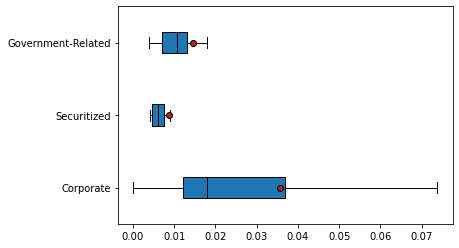

In [42]:
#LEVEL 1
modalites = quali_2['Level1'].unique()

groupes = []
for m in modalites:
    groupes.append(quali_2[quali_2['Level1']==m]["PD_1y"])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

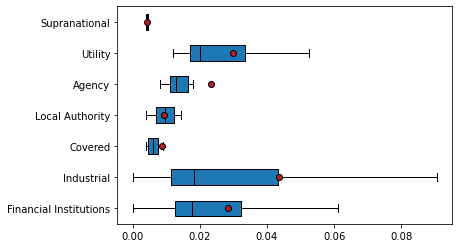

In [43]:
#LEVEL 2
modalites = quali_2['Level2'].unique()

groupes = []
for m in modalites:
    groupes.append(quali_2[quali_2['Level2']==m]["PD_1y"])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

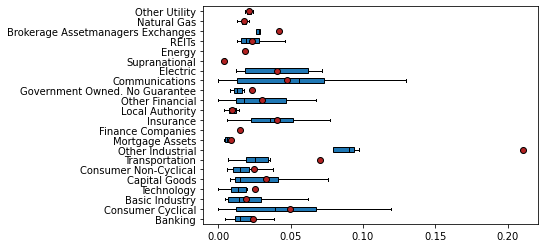

In [44]:
#LEVEL 3
modalites = quali_2['Level3'].unique()

groupes = []
for m in modalites:
    groupes.append(quali_2[quali_2['Level3']==m]["PD_1y"])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

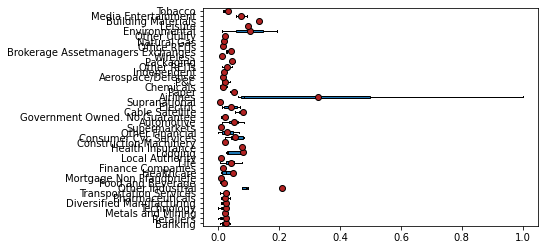

In [45]:
#LEVEL 4
modalites = quali_2['Level4'].unique()

groupes = []
for m in modalites:
    groupes.append(quali_2[quali_2['Level4']==m]["PD_1y"])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

## 2. ANOVA / Test F 

ANOVA (ou analyse de la variance) permet de déterminer si les moyennes des groupes sont égales. ANOVA utilise des tests F (Fischer) pour tester statistiquement l'égalité des moyennes. La **statistique F** est un ratio de deux écart-types : variation entre les moyennes d'échantillonage sur variation à l'intérieur des échantillons.

**Hypothèse** $H_0$ *:* $M_1 = M_2 = \ ... \ = M_k$ *(indépendance). VS* $H_1$ *:*  il existe au moins un couple (i,j) tel que $M_i \ne M_j$ *(non indépendance)*

**p-value :** Si $Pr_{obs} < Pr_{seuil}$, on rejette l'hypothèse $H_0$ d'indépendance.


--------

**Limites :** 
Il y a 3 hypothèses à vérifier : les résidus sont indépendants, les résidus suivent une loi Normale de moyenne 0 et de variance = variance résiduelle, les résidus sont homogènes.

--------

In [46]:
import statsmodels.formula.api
import statsmodels.api

In [47]:
fit1 = statsmodels.formula.api.ols('PD_1y ~ Level1', data = quali_2).fit()

#table = statsmodels.api.stats.anova_lm(fit,robust = 'hc3')
table1 = statsmodels.api.stats.anova_lm(fit1)
table1

,df,sum_sq,mean_sq,F,PR(>F)
Level1,2.0,0.018841,0.009421,1.839102,0.15987
Residual,590.0,3.022225,0.005122,NaN,NaN


In [48]:
fit2 = statsmodels.formula.api.ols('PD_1y ~ Level2', data = quali_2).fit()

#table = statsmodels.api.stats.anova_lm(fit,robust = 'hc3') #robuste à l'hétéroscédasticité 
table2 = statsmodels.api.stats.anova_lm(fit2)
table2

,df,sum_sq,mean_sq,F,PR(>F)
Level2,6.0,0.051938,0.008656,1.697028,0.11932
Residual,586.0,2.989128,0.005101,NaN,NaN


In [49]:
fit3 = statsmodels.formula.api.ols('PD_1y ~ Level3', data = quali_2).fit()

table3 = statsmodels.api.stats.anova_lm(fit3,robust = 'hc3')
#table3 = statsmodels.api.stats.anova_lm(fit3)
table3

,df,sum_sq,mean_sq,F,PR(>F)
Level3,21.0,0.345325,0.016444,3.483106,3.572487e-07
Residual,571.0,2.695741,0.004721,NaN,NaN


In [50]:
fit4 = statsmodels.formula.api.ols('PD_1y ~ Level4', data = quali_2).fit()

table4 = statsmodels.api.stats.anova_lm(fit4,robust = 'hc3')
#table4 = statsmodels.api.stats.anova_lm(fit4)
table4

,df,sum_sq,mean_sq,F,PR(>F)
Level4,42.0,0.968679,0.023064,6.120996,1.140532e-25
Residual,550.0,2.072388,0.003768,NaN,NaN


Les secteurs pris aux échelles 3 et 4 sont statistiquement significatifs. 

Le principe du test de Kruskall-Wallis est identique, avec des hypothèses moins restrictives. 

## 3. Test de Kruskall-Wallis 

Il s'agit d'un test non paramétrique à utiliser lorsque l'on est en présence de k échantillons indépendants, afin de déterminer si les échantillons proviennent d'une même population ou si au moins un échantillon provient d'une population différente des autres. 


$k$ échantillons = $k$ groupes formés par la modalité de la variable. On compare les distributions des groupes pour voir s'ils sont distribués pareillement.

**Hypothèse** $H_0$ *:* $M_1 = M_2 = \ ... \ = M_k$ *(indépendance). VS* $H_1$ *:*  il existe au moins un couple (i,j) tel que $M_i \ne M_j$ *(non indépendance)*

**p-value :** Si $\alpha_{obs} < \alpha_{seuil}$, on rejette l'hypothèse $H_0$ d'indépendance.


In [51]:
from scipy import stats

In [52]:
#LEVEL 1
arr = []
for sector in quali_2['Level1'].unique() : 
    arr.append(quali_2[quali_2["Level1"] == sector]["PD_1y"].values)

stats.mstats.kruskalwallis(arr[0],arr[1],arr[2])

KruskalResult(statistic=42.349630422483735, pvalue=6.366409918910258e-10)

In [53]:
#LEVEL 2
arr = []
for sector in quali_2['Level2'].unique() :     
    arr.append(quali_2[quali_2["Level2"] == sector]["PD_1y"].values)

stats.mstats.kruskalwallis(arr[0],arr[1],arr[2],arr[3],arr[4],arr[5],arr[6])

KruskalResult(statistic=49.73843801059403, pvalue=5.304207818518009e-09)

In [54]:
#LEVEL 3
arr = []
for sector in quali_2['Level3'].unique() :     
    arr.append(quali_2[quali_2["Level3"] == sector]["PD_1y"].values)

stats.mstats.kruskalwallis(arr[0],arr[1],arr[2],arr[3],arr[4],arr[5],arr[6],arr[7],arr[8],arr[9],arr[10],arr[11],arr[12],arr[13],arr[14],arr[15],arr[16],arr[17],arr[18],arr[19],arr[20],arr[21])

KruskalResult(statistic=119.99223472884972, pvalue=7.164257798080409e-16)

In [55]:
#LEVEL 4
arr = []
for sector in quali_2['Level4'].unique() :     
    arr.append(quali_2[quali_2["Level4"] == sector]["PD_1y"].values)

stats.mstats.kruskalwallis(arr[0],arr[1],arr[2],arr[3],arr[4],arr[5],arr[6],arr[7],arr[8],arr[9],arr[10],arr[11],arr[12],arr[13],arr[14],arr[15],arr[16],arr[17],arr[18],arr[19],arr[20],arr[21],arr[22],arr[23],arr[24],arr[25],arr[26],arr[27],arr[28],arr[29],arr[30],arr[31],arr[32],arr[33],arr[34],arr[35],arr[36],arr[37],arr[38],arr[39],arr[40],arr[41],arr[42])

KruskalResult(statistic=207.72557724506382, pvalue=8.467029408005822e-24)

Les p-values du test aux différents niveaux sont très faibles. Le secteur a a priori un effet significatif sur la PD des entreprises. 

Aux vues des résultats des 2 tests, choix à faire entre les échelles 3 et 4. 


4 est a priori plus significatif que 3, mais j'ai peur qu'il y ait trop de modalités et pas assez d'observations pour chaque modalité. Il faudrait retester avec bien plus de valeurs mais **3 me semble un bon compromis**. 

## B. Autres variables quali

In [48]:
quali_2 = df[['PD_1y','Guarantee Type','Guarantor Type','Collat Type']]
quali_2

,PD_1y,Guarantee Type,Guarantor Type,Collat Type
0,0.064724,Multiple,Company,SR SECURED
1,0.064725,Multiple,Company,SR SECURED
2,0.065177,Multiple,Company,SR SECURED
3,0.010822,Single,Parent,COMPANY GUARNT
4,0.010326,Single,Parent,COMPANY GUARNT
...,...,...,...,...
7118,0.013995,N.A.,N.A.,SR UNSECURED
7119,0.005987,Single,Company,COMPANY GUARNT
7120,0.004816,N.A.,N.A.,SR UNSECURED
7121,0.001191,N.A.,N.A.,PFANDBRIEFE


### a. Stat desc

In [52]:
#GUARANTEE TYPE
quali_2["Guarantee Type"].value_counts()

N.A.               4988
Single             1424
Multiple            696
Cross Guarantee      15
Name: Guarantee Type, dtype: int64

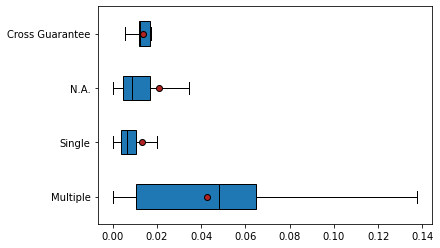

In [56]:
modalites = quali_2['Guarantee Type'].unique()

groupes = []
for m in modalites:
    groupes.append(quali_2[quali_2['Guarantee Type']==m]["PD_1y"])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [53]:
#GUARANTOR TYPE
quali_2["Guarantor Type"].value_counts()

N.A.                             4988
Parent                           1046
Subsidiaries                      548
Parent & Subsidiaries             255
National/Sovereign Government     160
Company                            81
Local Government                   30
Domestic Restricted Subsidiar       8
Bank                                3
Other Subsidiary of Parent          2
Restricted Subsidiaries             2
Name: Guarantor Type, dtype: int64

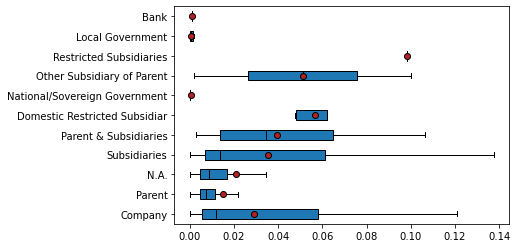

In [57]:
modalites = quali_2['Guarantor Type'].unique()

groupes = []
for m in modalites:
    groupes.append(quali_2[quali_2['Guarantor Type']==m]["PD_1y"])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [54]:
#COLLAT TYPE
quali_2["Collat Type"].value_counts()

SR UNSECURED        4212
COMPANY GUARNT      1510
SR SECURED           498
COVERED              323
SUBORDINATED         253
GOVT GUARANTEED      151
PFANDBRIEFE           79
LOCAL GOVT GUARN      30
UNSECURED             19
SECURED               16
JUMBO PFANDBRIEF      16
GOVT LIQUID GTD        9
SR SUBORDINATED        5
BONDS                  2
Name: Collat Type, dtype: int64

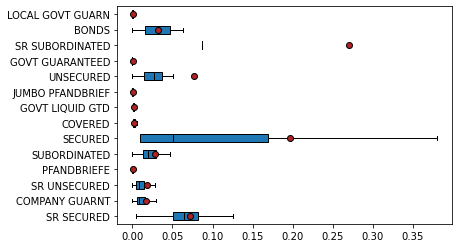

In [58]:
modalites = quali_2['Collat Type'].unique()

groupes = []
for m in modalites:
    groupes.append(quali_2[quali_2['Collat Type']==m]["PD_1y"])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

### b. ANOVA / test F

In [59]:
import statsmodels.formula.api
import statsmodels.api

In [60]:
quali_2.rename(columns={'Guarantee Type':'Guarantee'}, inplace=True)
quali_2.rename(columns={'Guarantor Type':'Guarantor'}, inplace=True)
quali_2.rename(columns={'Collat Type':'Collat'}, inplace=True)

C:\Users\mathilde.binet\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [61]:
fit1 = statsmodels.formula.api.ols('PD_1y ~ Guarantee', data = quali_2).fit()

#table = statsmodels.api.stats.anova_lm(fit,robust = 'hc3')
table1 = statsmodels.api.stats.anova_lm(fit1)
table1

,df,sum_sq,mean_sq,F,PR(>F)
Guarantee,3.0,0.417039,0.139013,38.097817,2.041270e-24
Residual,7119.0,25.976117,0.003649,NaN,NaN


In [63]:
fit2 = statsmodels.formula.api.ols('PD_1y ~ Guarantor', data = quali_2).fit()

#table = statsmodels.api.stats.anova_lm(fit,robust = 'hc3')
table2 = statsmodels.api.stats.anova_lm(fit2)
table2

,df,sum_sq,mean_sq,F,PR(>F)
Guarantor,10.0,0.338758,0.033876,9.246999,2.221396e-15
Residual,7112.0,26.054398,0.003663,NaN,NaN


In [65]:
fit3 = statsmodels.formula.api.ols('PD_1y ~ Collat', data = quali_2).fit()

#table = statsmodels.api.stats.anova_lm(fit,robust = 'hc3')
table3 = statsmodels.api.stats.anova_lm(fit3)
table3

,df,sum_sq,mean_sq,F,PR(>F)
Collat,13.0,2.465315,0.189640,56.342229,1.090272e-140
Residual,7109.0,23.927841,0.003366,NaN,NaN


### c. Kruskal-Wallis

In [66]:
from scipy import stats

In [67]:
arr = []
for sector in quali_2['Guarantee'].unique() : 
    arr.append(quali_2[quali_2["Guarantee"] == sector]["PD_1y"].values)

stats.mstats.kruskalwallis(arr[0],arr[1],arr[2])

KruskalResult(statistic=581.9234360709677, pvalue=4.334424196470975e-127)

In [68]:
arr = []
for sector in quali_2['Guarantor'].unique() : 
    arr.append(quali_2[quali_2["Guarantor"] == sector]["PD_1y"].values)

stats.mstats.kruskalwallis(arr[0],arr[1],arr[2])

KruskalResult(statistic=28.02429105825834, pvalue=8.214904462897966e-07)

In [69]:
arr = []
for sector in quali_2['Collat'].unique() : 
    arr.append(quali_2[quali_2["Collat"] == sector]["PD_1y"].values)

stats.mstats.kruskalwallis(arr[0],arr[1],arr[2])

KruskalResult(statistic=1048.5880328701094, pvalue=2.0044801845876902e-228)

**Les 3 variables quali étudiées ici apparaissent être significatives pour expliquer PD_1y.** Avant de les valider, on regarde leurs corrélations entre elles. 

### d. Corrélation entre les quali

Les 3 variables que nous venons d'identifier sont assez proches les unes des autres. Le risque qu'elles soient fortement corrélées, et donc que ce soit des doublons dans la modélisation, est donc grand. Afin de ne sélectionner que celles qui donnent de l'information, on regarde la corrélation entre elles. Pour cela on utilise un V de Cramer (variables qualitatives).

In [77]:
quali_3 = quali_2[["Guarantee","Guarantor","Collat"]]

In [78]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in quali_3.columns :
  data_encoded[i]=label.fit_transform(quali_3[i])

In [79]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
quali_corr = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

quali_corr

,Guarantee,Guarantor,Collat
Guarantee,1.00,0.51,0.34
Guarantor,0.51,1.00,0.30
Collat,0.34,0.30,1.00


Je pense que ça vaut le coup de garder les 3. 

# Conclusion : 

Variables d'intérêt : 'Common Eqty / Tot Assets','Debt/EBITDA','EBITDA','Earnings Assets / Int Bear Liab','Debt / Common Equity','TCE Ratio','Interest Coverage Ratio','Risk-Based Cap Ratio','Lev Ratio to TCE','Tier-1 Ratio','Tot Debt / Tot Capital', 'Tot Cap (Local Crncy)','Is Covered','Is Convertible','Amt Out','Total Assets','Total Deposits','Total Expenses to Average Earning Assets','BCLASS Level 3', 'Guarantee Type', 'Guarantor Type, 'Collat Type'

Variables d'intéret moins ceux avec bcp de valeurs manquantes : 'Common Eqty / Tot Assets','Debt / Common Equity','TCE Ratio','Tot Debt / Tot Capital','Tot Cap (Local Crncy)','Is Covered','Is Convertible','Amt Out','Total Assets','BCLASS Level 3', 'Guarantee Type', 'Guarantor Type, 'Collat Type'

**Variables d'intérêt moins les doublons moins bcp de valeurs manquantes : 'Common Eqty / Tot Assets','TCE Ratio','Tot Debt / Tot Capital','Tot Cap (Local Crncy)','Is Covered','Is Convertible','Amt Out','BCLASS Level 3', 'Guarantee Type', 'Guarantor Type, 'Collat Type'.**

